# Code Assignment 5: Modeling of Particle Trajectories


(YOUR NAME HERE)

(TODAY'S DATE HERE)# 

*In solving each of the problems below, please include text comments and description for your future self, so that when you look back you'll have notes on how you solved these problems!*

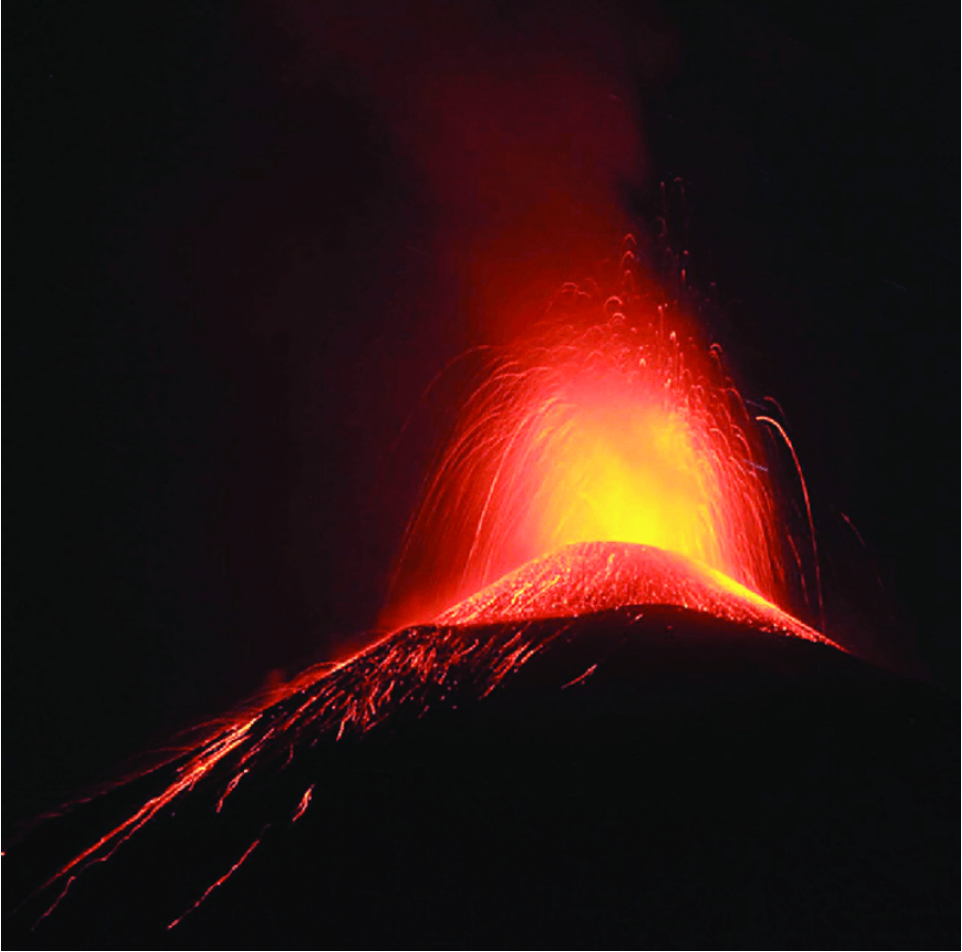

Volcanic Eruption of Klyuchevskoy Volcano, note the firy trajectories of spewed bombs.

## Background on Trajectories of Volcanic Bombs


###  Volcano cone geometry definitions

We simplify a volcano as a inclined, sloping line (as in the diagram below). Typically cone slopes are 25-32 degrees, but we can play with that slope angle later in the assignment. 

For simplicity we assume volcanic bombs are erupting from the rim of the crater, the top of the cone (point A in the diagram). The bombs travel through the air untill they crash into the side slope at their landing point (point B).

Any volcanic bomb is ejected with a certain velocity and angle, and follows the red line indicating its trajectory:

velocity $u$ in m/s <br>
launch angle, $\alpha$ in degrees <br>

Recall that you can decomponentize a velocity vector into its x-component and y-component. So, you have:<br> 

$ u_y = u sin(\alpha)$ along the y-axis <br>
$ u_x = u cos(\alpha)$ along the x-axis <br>

The elevation difference between the top of the volcanic cone (A) and the impact point along the slope (B) is denoted as $y_0$.




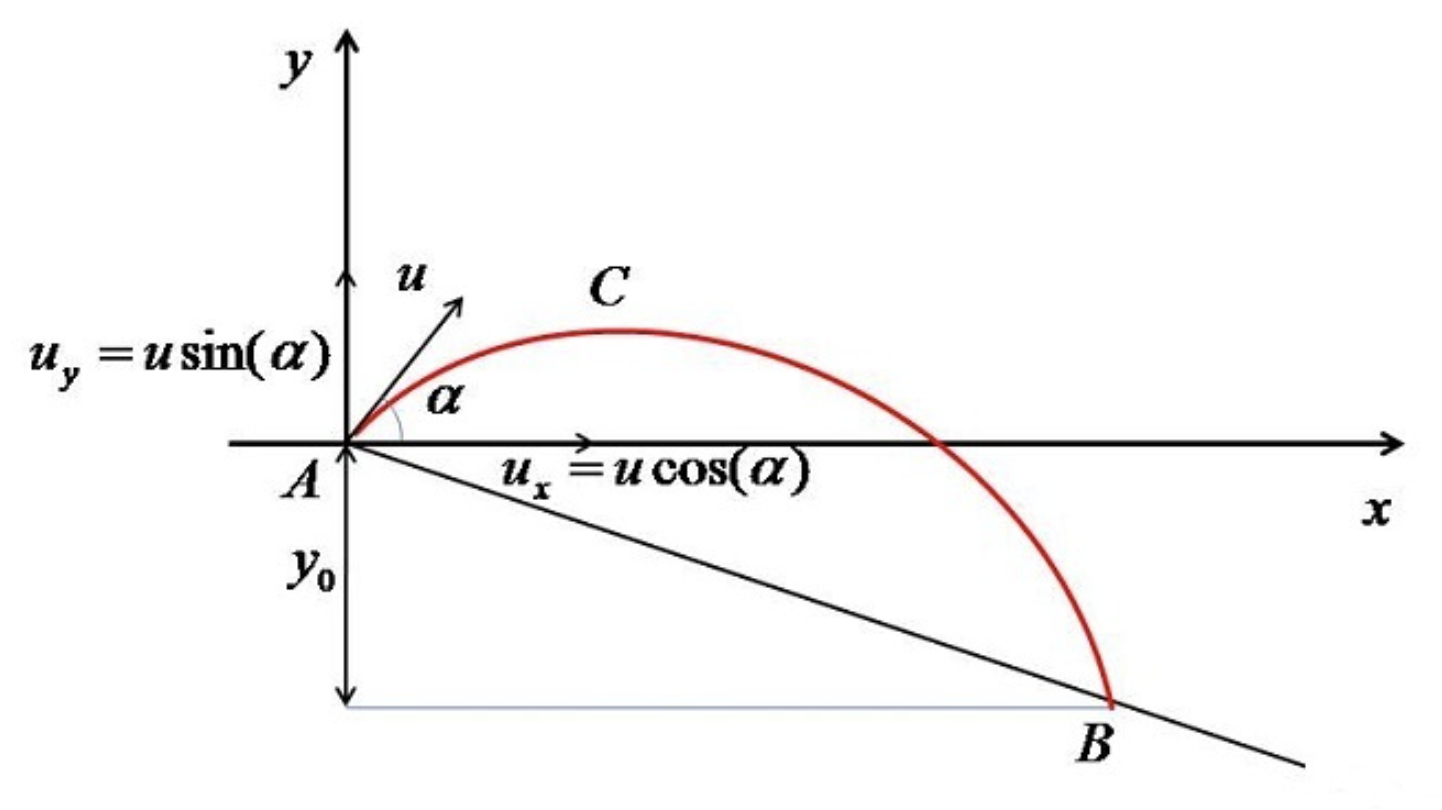



How to model the trajectory when the launching point is the high rim of a crater, and the landing points is somewhere down the volcano's slope? 

We first use the equation of motion in vertical direction:

$ s = u_y t + 1/2 a_y t^2 $

As we noted before $ u_y = u sin \alpha $ and $a_y = -g$, so substitution yields:<br>

$ s = u sin \alpha t - 1/2 g t^2 $ <br>

When the projectile reaches B then $y$ will get replaced by $−y_0$, the elevation below the X-axis. So you state the previous equations as: <br>

$ -y_0 = u {sin \alpha} t - 1/2 g t^2 $   <br>

Bring terms to one side to get a quadratic equation, that can be solved for t:  <br>

$ g t^2 - 2u sin \alpha  - 2y_0 = 0 $  <br>

The impact location range, R, i.e. the distance to the impact point B can be determined from:  <br>

$ R = u cos (\alpha) $  <br>



Hint: solving a quadratic equation in python can be done using numpy roots:
        https://numpy.org/doc/stable/reference/generated/numpy.roots.html

In [ ]:
# import python packages

import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
# set initial values

# Velocity at the start
u=20

# Angle of projectile at start
alpha=np.radians(45)

# Elevation of crater rim above the base level
y0=300

# Acceleration due to gravity
g=9.81

In [ ]:
# First we calculate the time of flight from the quadratic equation

a=g
b=-2*u*np.sin(alpha)
c=-2*y0

# coefficient array
coeff=np.array([a,b,c])

# finding roots
t1,t2=np.roots(coeff)
print("t1= ", t1, "and", "t2 = ", t2)

This returns two roots, i.e., two values of time.
The non-negative value will be accepted.

The maximum height of the projectile can be calculated from: <br>

$ h_{max} = u^2 {sin^2(\alpha)}/2g $


In [ ]:
# Determine the maximum height

# From the ejection point, A
h1=u**2*(np.sin(alpha))**2/(2*g)

# Maximum height
h_max=h1+y0
print(f"h_max= {round(h_max,3)} m")


In [ ]:
# Range of the volcanic bombs

R=u*np.cos(alpha)*max(t1,t2)
# max(t1,t2) will return the positive value

print(f"R= {round(R,3)} m")

In [ ]:
# Figure name
plt.figure(1, dpi=300)

# Plot volcano slope
plt.plot([0,R],[0,-y0],linewidth=5)

# plotting y=0 line
plt.plot([0,R],[0,0],'k',linewidth=1)

# Array of x
x=np.linspace(0,R,50)

# Evaluating y based on x
y=x*np.tan(alpha)-(1/2)*(g*x**2)/(u**2*(np.cos(alpha))**2 )

# Plotting projectile
plt.plot(x,y,'o-',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Inc_Proj.jpg")
plt.show()

## Part 1 Investigate how the slope of the cone influences where projectiles impact

1a Create a program using the code above and vary the cone slope between two end-member slopes, 20 degrees and 35 degrees. 
Calculate where volcanic bombs impact the two respective slopes if they are ejected at 5, m/s, 10 m/s, 25 m/s. 

1b What implications does cone slope have on the amount of impacts it receives? 

1c Please you discuss how different slopes could result from scoria or lapilli deposition? 


In [ ]:
# your calculations


In [ ]:
# your discussion on the cone slope


In [ ]:
# your discussion on the character of the volcanic ejecta


## Part 2 Create random input data of volcanic bombs being ejected

As you read in teh background, launch angle and velocity are key variables in determining the trajectory of volcanic ejecta. But any eruption will likely eject differt sizes of bombs, with different angles and different velocity. Here we aim to generate an input data set that comprises a distribution of angles and velocities.

- Write a function called "random_firing", that creates random, uniformly distributed launch angles sampled between a minimum angle and maximum angle, and uniformly distributed velocities sampled between a minimum and maximum velocity.

- For best programming practices add a doc string to your function

- Then, run your function 200 times using a for-loop.

- Plot histograms of the generated angle and velocity input data.

In [ ]:
# your function

## Part 3 How to calculate trajectories?

In the background section we showed how to calculate the maximum height and range of trajectories from the assumption that the trajectory is a parabola (which holds when there is no air resistance). 

But what if we want to numerically model the trajectory and be able to calculate the height, h at any given distance, x along the x-axis?


 ### Solution
    
$ h = A + x tan (\alpha) - {x^2 g}/(cos(\alpha) u)^2 $


In [ ]:
# derive the equation above


In [ ]:
# explain whether the angle needs be specified in degrees or in radians


## Part 4 Calculate trajectories 

Write a function called "calc_trajectory" that calculates and returns height of projectiles as a function of distance given initial crater rim height, A, velocity, u, and angle, $\alpha$, and gravitational constant, $g$.

For best programming practices add a doc string to your function


In [ ]:
# your function goes here

## Part 5 Write a program to calculate trajectories using a random input dataset


Here we will put your previous functions together and write a program that builts a ciner cone from a newly opened vent.

Write a program that launches 100000 volcanic bombs of 1 m^3 that are assigned random angle and velocity at launch. Assign the vent at $x_0$. Keep track of an x-profile of elevation that is 2km lenght, with 1 m gridcells.
Increase the elevation of the profile at the position where the bomb lands (based on the gridcell size and the bom volume).

Plot the elevation profiles after 25000 , after 50000 and 75000 bombs have impacted.


In [ ]:
# write the pseudo code of your program, use the intialize, run, finalize steps. 

In [ ]:
# your actual program here

In [ ]:
# create 3 plots, at 25%, 50% and 75% through your program

## Part 6 for graduate students (or bonus)

Here we ask the question what would change if a cinder cone was located on Mars? 

Let's explore the birth of a volcano on Earth versus on Mars. 
We will start from an initially flat surface, no cone has evolved yet. 
This means you will have to re-think the geometry of the problem set-up.

Create an interactive program to explore the difference of volcanic bomb behavior on different planets. 

 - Calculate trajectories of volcanic ejecta for Earth and Mars over an range of angles, and a velocity that is given by the user. 

- Calculate the landing spots for each of these trajectories. 

- Present side-by-side plots of trajectories on Earth and Mars.

- Quantify and plot the difference of the impact zone (i.e. the range R) for Earth and Mars. 



In [ ]:
# your notes on the different conditions on earth and Mars as they apply to volcanic bombs. 
# Hint: you can read the paper listed in the reference list.


In [ ]:
# derive/list equations for hmax, range and T in case of an newly opened vent, so no slope has evolved yet.

In [ ]:
# your program that plots trajectories for Earth and Mars from user input of velocity.

In [ ]:
# what can you infer from your model outputs?

# Reference

Petr Brož, Ondřej Čadek, Ernst Hauber, Angelo Pio Rossi,
Shape of scoria cones on Mars: Insights from numerical modeling of ballistic pathways,
Earth and Planetary Science Letters,
Volume 406,2014,Pages 14-23,

https://doi.org/10.1016/j.epsl.2014.09.002.


A blog post that summarizes this paper and earlier research:
https://planetarygeomorphology.wordpress.com/2017/01/30/everything-you-wanted-to-know-about-martian-scoria-cones-but-were-afraid-to-ask/#:~:text=On%20Mars%2C%20the%20existence%20of,Bro%C5%BE%20and%20Hauber%2C%202012).
